```yaml
title: Automating Setup
description: This Notebook will illustrate how we can automate the build of this entire Jupyter setup in a custom conda environment.
date: 2024-01-05
```

In [2]:
%%html
<style>
    body {
        --vscode-font-family: "lmroman17-regular"
    }
</style>

# [How to Automate Python Environment](https://towardsdatascience.com/how-to-automate-python-environment-creation-850743f1c09e)

> **Objective**
>
> Create a custom Conda environment and integrate into Jupyter Notebooks with a single command.

## Outline of Project

I want to automate the steps that it took to configure the Lua Programming/Jupyter Notebook `conda` environment as there were a few annoying bits to the installation. I would like to prevent such hiccups in the future and also learn how to create build scripts for future environments instead of always installing programs and packages to my global/base environment.

### Prerequisites

- User has `conda` installed on their system.
- User will want to specify the Python version every time they create a new environment.

### Actions of Program

- Create environment of specified name and Python version.
- Install `ipykernel` to the Python environment.
- Link environment to Jupyter kernel.

Once all of these actions are complete, we can then activate the environment and install whatever packages we need and immediately use them in Jupyter.

## Developing the Script

First, in the root directory, create a new folder called `scripts`. This will allow us to put any other scripts we make in this folder as well. Let's create two scripts `01-create-env.sh` and `02-build-env.sh`.

Assuming this root directory is the current workspace open in VS Code, your directory structure will look like the following:

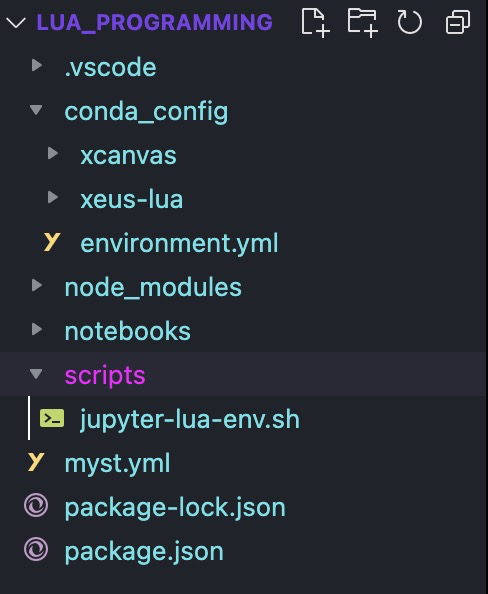

Make sure you know where your `bash` is located. I am working in an Apple Silicon architecture and prefer to use `homebrew` to manage my packages rather than relying on the native MacOS installations of `python`, `bash`, etc. To install the latest version of `bash` just run:

```zsh
brew install bash
```

Then locate your `.bashrc` file and add the `$BREW_PREFIX` to the `$PATH` variable with the following line:

```bash
export PATH="/opt/homebrew/bin:/opt/homebrew/sbin:$PATH"
```

Now, when you run the `which bash` command you should get the following output:

```zsh
which bash
```

`/opt/homebrew/bin/bash`

Using a _shebang_ or `#!`, we can put it in front of our path to ensure that our files are executable. This will will be the first line in both of our scripts.

We will use two scripts to get this job done. The first script will just create the virtual environment with its name (first parameter) and the Python version (second parameter).

While this is only one line, we are placing this in a different file because the execution ends after the environment is completed. This is where the second file comes in, allowing us to call the first script to create the environment, then using the rest of the script to build the Jupyter kernel.

Please find the complete scripts here:

- [Script 1 (`01-create-env.sh`)](../scripts/01-create-env.sh)
- [Script 2 (`02-build-env.sh`)](../scripts/02-build-env.sh)

Here is what the first file looks like:

```sh
#! /opt/homebrew/bin/bash
conda create -n $1 python=$2
```

If you are not familiar with `bash` syntax, `$1` represents the first parameter that is needed to run the file, whereas `$2` represents the second parameter.

For the second file, we will call `01-create-env.sh` and continue the kernel creation process. Here's what that looks like:

```sh
#! /opt/homebrew/bin/bash
# Run this script in the root directory as follows where <PROJECT_PREFIX> is the absolute path to root directory or the output of pwd command: 
# scripts/02-build-env.sh <PROJECT_PREFIX>

# Make configuration directory for 
mkdir ./.config

# Environment has been created. Now, we install the necessary packages in it. 
bash ./scripts/01-create-env.sh $1

# Source Miniconda so we can activate the env in the bash script.
source /opt/homebrew/Caskroom/miniconda/base/etc/profile.d/conda.sh

# Activate env and install ipykernel
conda activate jupyter-lua
conda install ipykernel

# Link environment to Jupyter
python -m ipykernel install --user --name=jupyter-lua

# Initialize node.js
npm init

# Install ijavascript kernel
npm install ijavascript
ijinstall

# Change to the conda_config directory for next few steps.
cd $1/.config

# Install xeus-lua kernel which has a dependency on xcanvas. This dependency must be installed from source.
git clone git@github.com:jupyter-xeus/xcanvas.git
cd xcanvas && mkdir build && cd build
cmake -D CMAKE_INSTALL_PREFIX=$CONDA_PREFIX ..
make install

# Go back to the conda_config directory
cd $1/.config

# Install xeus-lua from source
git clone git@github.com:jupyter-xeus/xeus-lua.git
cd xeus-lua && mkdir build && cd build
cmake .. -D CMAKE_PREFIX_PATH=$CONDA_PREFIX -D CMAKE_INSTALL_PREFIX=$CONDA_PREFIX -D CMAKE_INSTALL_LIBDIR=lib
```

First, we call `01-create-env.sh` with the parameters needed. This means that both files will using the same parameters. Once this is done, we must source `miniconda` such that we can activate the environment, use `conda` to install `ipykernel`, and link the environment to the kernel with the same name of the environment.

## Running the Script

We can set permissions and run the script with the following where `<PROJECT_PREFIX>` is the `pwd`:

```zsh
chmod -R 755 scripts
./scripts/02-build-env.sh <PROJECT_PREFIX>
```

This will create a new `conda` environment called `jupyter-lua`. Furthermore, as we saw in `02-build-env.sh`, it will also create a Jupyter kernel that is called `jupyter-lua`, which we can begin to use immediately after starting up Jupyter Notebooks.

# Next Steps

We will return to these build scripts once we configure and build our own kernel with expanded features to better suit the project. 